In [2]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn umap-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt

# Aeschi 2019-20 Dataset Cleaning

In [4]:
df = pd.read_csv("../datasets/Aeschi_2019-20.csv")
df.columns

Index(['TIMESTAMP', 'TA', 'RH', 'PA', 'Rg', 'PREC', 'SWC_0.05', 'SWC_0.15',
       'SWC_0.3', 'WFPS_0.05', 'WFPS_0.15', 'WFPS_0.3', 'TS_0.05', 'TS_0.15',
       'TS_0.3', 'PREC_rmean6', 'SWC_0.05_rmean6', 'SWC_0.15_rmean6',
       'SWC_0.3_rmean6', 'WFPS_0.05_rmean6', 'WFPS_0.15_rmean6',
       'WFPS_0.3_rmean6', 'TS_0.05_rmean6', 'TS_0.15_rmean6', 'TS_0.3_rmean6',
       'PREC_rmean6.6', 'PREC_rmean6.12', 'PREC_rmean6.18',
       'SWC_0.05_rmean6.6', 'SWC_0.05_rmean6.12', 'SWC_0.05_rmean6.18',
       'SWC_0.15_rmean6.6', 'SWC_0.15_rmean6.12', 'SWC_0.15_rmean6.18',
       'SWC_0.3_rmean6.6', 'SWC_0.3_rmean6.12', 'SWC_0.3_rmean6.18',
       'WFPS_0.05_rmean6.6', 'WFPS_0.05_rmean6.12', 'WFPS_0.05_rmean6.18',
       'WFPS_0.15_rmean6.6', 'WFPS_0.15_rmean6.12', 'WFPS_0.15_rmean6.18',
       'WFPS_0.3_rmean6.6', 'WFPS_0.3_rmean6.12', 'WFPS_0.3_rmean6.18',
       'TS_0.05_rmean6.6', 'TS_0.05_rmean6.12', 'TS_0.05_rmean6.18',
       'TS_0.15_rmean6.6', 'TS_0.15_rmean6.12', 'TS_0.15_rmean6.18',

In [5]:
df.head(10)

,TIMESTAMP,TA,RH,PA,Rg,PREC,SWC_0.05,SWC_0.15,SWC_0.3,WFPS_0.05,WFPS_0.15,WFPS_0.3,TS_0.05,TS_0.15,TS_0.3,PREC_rmean6,SWC_0.05_rmean6,SWC_0.15_rmean6,SWC_0.3_rmean6,WFPS_0.05_rmean6,WFPS_0.15_rmean6,WFPS_0.3_rmean6,TS_0.05_rmean6,TS_0.15_rmean6,TS_0.3_rmean6,PREC_rmean6.6,PREC_rmean6.12,PREC_rmean6.18,SWC_0.05_rmean6.6,SWC_0.05_rmean6.12,SWC_0.05_rmean6.18,SWC_0.15_rmean6.6,SWC_0.15_rmean6.12,SWC_0.15_rmean6.18,SWC_0.3_rmean6.6,SWC_0.3_rmean6.12,SWC_0.3_rmean6.18,WFPS_0.05_rmean6.6,WFPS_0.05_rmean6.12,WFPS_0.05_rmean6.18,WFPS_0.15_rmean6.6,WFPS_0.15_rmean6.12,WFPS_0.15_rmean6.18,WFPS_0.3_rmean6.6,WFPS_0.3_rmean6.12,WFPS_0.3_rmean6.18,TS_0.05_rmean6.6,TS_0.05_rmean6.12,TS_0.05_rmean6.18,TS_0.15_rmean6.6,TS_0.15_rmean6.12,TS_0.15_rmean6.18,TS_0.3_rmean6.6,TS_0.3_rmean6.12,TS_0.3_rmean6.18,harvest,MGMT,timesince.PREC,timesince.harvest,timesince.MGMT,VPD,VPD_rmean6,VPD_rmean6.6,VPD_rmean6.12,VPD_rmean6.18,GPP_f,Reco_f,NEE_f,N2O_flag0_ustar,N2O_RF_filled,CH4_flag01_ustar,CH4_RF_filled
0,2019-07-03 00:15,18.900000,68.100000,96.410000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.454488,9.082439,8.627951,NaN,0.235332,NaN,5.186318
1,2019-07-03 00:45,18.366667,70.800000,96.396667,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,-0.281831,8.873489,9.155320,NaN,0.233957,NaN,4.886372
2,2019-07-03 01:15,18.266667,71.633333,96.400000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,-0.113190,8.832546,8.945736,NaN,0.236140,NaN,4.837571
3,2019-07-03 01:45,18.600000,69.633333,96.396667,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,-0.581659,8.958857,9.540516,NaN,0.234649,NaN,4.960879
4,2019-07-03 02:15,18.600000,68.400000,96.386667,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,-0.678365,8.956450,9.634815,NaN,0.233149,NaN,4.910989
5,2019-07-03 02:45,18.233333,69.166667,96.390000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,-0.078460,8.812595,8.891055,NaN,0.200625,NaN,4.620430
6,2019-07-03 03:15,18.200000,67.333333,96.393333,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,0.255143,8.797402,8.542259,NaN,0.198080,NaN,4.850991
7,2019-07-03 03:45,17.966667,66.900000,96.406667,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,0.014605,8.705448,8.690843,NaN,0.202614,NaN,4.982272
8,2019-07-03 04:15,17.933333,64.766667,96.423333,0.333333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
# filter out rows without a response variable
df_no_na = df[df["N2O_flag0_ustar"].notna()]

cols = [
    # Target
    "N2O_flag0_ustar",

    # Timestamp
    "TIMESTAMP",
    
    # Predictors
    "NEE_f",
    "GPP_f",
    "Reco_f",
    "Rg",
    "TA",
    "PREC",
    "VPD",                     # Vapor pressure deficit
    "SWC_0.05",
    "SWC_0.15",
    "SWC_0.3",
    "TS_0.05",
    "TS_0.15",
    "TS_0.3",
    "harvest",
]

aeschi_19_20 = df_no_na[cols]

rename_map = {
    "N2O_flag0_ustar": "N2O_Flux",
    "TIMESTAMP": "Timestamp",
    "NEE_f": "NEE",            # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_f": "GPP",            # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_f": "RECO",          # CO₂ emitted via respiration of plants and soil organisms
    "Rg": "SolarRadiation",
    "TA": "AirTemp",
    "PREC": "Precipitation",
    "SWC_0.05": "SoilWater_5cm",
    "SWC_0.15": "SoilWater_15cm",
    "SWC_0.3": "SoilWater_30cm",
    "TS_0.05": "SoilTemp_5cm",
    "TS_0.15": "SoilTemp_15cm",
    "TS_0.3": "SoilTemp_30cm",
    "harvest": "Mowing",
}

aeschi = aeschi_19_20.rename(columns=rename_map)
aeschi["Timestamp"] = pd.to_datetime(aeschi["Timestamp"])

In [7]:
aeschi.head(10)

,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing
29,-0.694262,2019-07-03 14:45:00,-1.334854,13.239877,11.905023,737.666667,26.133333,0.0,1699.23,19.410920,23.845750,20.022300,27.000000,25.000000,23.800000,0.0
30,0.600286,2019-07-03 15:15:00,-9.021352,20.950640,11.929288,663.666667,26.200000,0.0,1702.54,19.410920,23.845750,20.003320,26.900000,25.133333,23.866667,0.0
31,0.223581,2019-07-03 15:45:00,-3.687444,15.613504,11.926059,504.333333,26.200000,0.0,1716.11,19.301757,23.845750,20.015973,26.466667,25.266667,23.966667,0.0
32,0.477189,2019-07-03 16:15:00,-1.181895,13.063521,11.881626,418.333333,26.100000,0.0,1703.75,19.276050,23.851513,19.996993,26.166667,25.400000,24.033333,0.0
33,0.580062,2019-07-03 16:45:00,-1.327793,13.082796,11.755004,297.333333,25.800000,0.0,1649.49,19.224560,23.851513,20.022297,26.000000,25.400000,24.100000,0.0
35,0.489334,2019-07-03 17:45:00,0.751450,10.751303,11.502753,208.333333,25.200000,0.0,1520.39,19.140760,23.845750,20.028620,25.666667,25.400000,24.233333,0.0
36,0.518727,2019-07-03 18:15:00,0.016413,11.401526,11.417938,214.000000,25.000000,0.0,1489.76,19.140760,23.845750,20.034943,25.533333,25.400000,24.300000,0.0
37,0.275285,2019-07-03 18:45:00,-0.211964,11.613206,11.401242,198.000000,24.966667,0.0,1467.89,19.108477,23.839987,20.015973,25.366667,25.366667,24.333333,0.0
38,-0.317334,2019-07-03 19:15:00,1.299800,9.894818,11.194618,94.666667,24.466667,0.0,1370.66,19.018010,23.811160,20.028617,25.200000,25.300000,24.400000,0.0
40,0.188172,2019-07-03 20:15:00,2.811274,8.053479,10.864753,8.000000,23.666667,0.0,1278.22,18.998597,23.759217,20.041270,24.666667,25.200000,24.433333,0.0


In [13]:
aeschi.to_csv("../datasets/Aeschi_2019-20_clean.csv")

# Further Analysis and Checks

In [6]:
# Ensure timestamp is datetime and sorted
aeschi = aeschi.sort_values("Timestamp")

# Compute time difference between consecutive timestamps
aeschi["time_diff"] = aeschi["Timestamp"].diff()

# Look at large gaps
print(aeschi["time_diff"].describe())
aeschi[aeschi["time_diff"] > "3 days"].head(50)

count                         1831
mean     0 days 06:23:53.315128345
std      9 days 21:01:31.882388844
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 00:30:00
max              422 days 15:00:00
Name: time_diff, dtype: object


,N2O_Flux,Timestamp,NEE,GPP,RECO,SolarRadiation,AirTemp,Precipitation,VPD,SoilWater_5cm,SoilWater_15cm,SoilWater_30cm,SoilTemp_5cm,SoilTemp_15cm,SoilTemp_30cm,Mowing,time_diff
21238,-0.376863,2020-09-17 11:15:00,0.982703,4.176756,5.159459,567.111113,22.922222,0.0,1152.78,19.812986,18.195187,27.208053,21.347222,19.330555,19.795555,0.0,422 days 15:00:00


# PCA plots

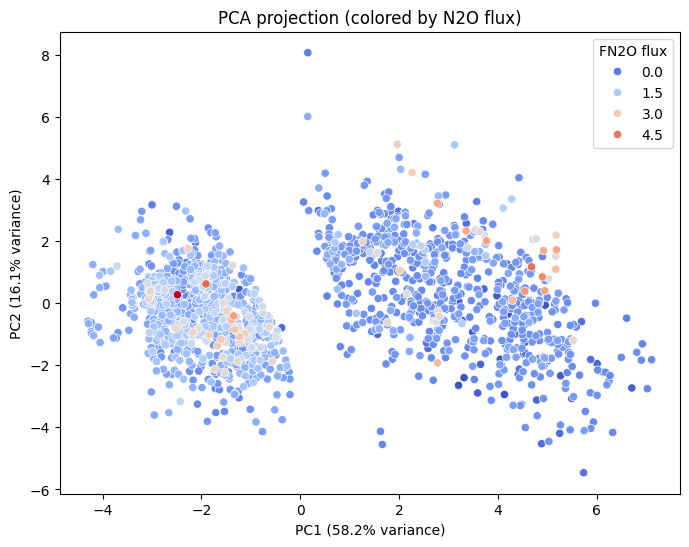

In [7]:
aeschi_clean = aeschi.dropna()
aeschi_clean = aeschi_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X = aeschi_clean.drop(columns=["N2O_Flux", "Timestamp", "time_diff"])
y = aeschi_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled = StandardScaler().fit_transform(X)

# Run PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df["FN2O"] = y.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [17]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                     PC1       PC2
SoilTemp_5cm    0.355022  0.010072
SoilTemp_15cm   0.348156  0.144734
AirTemp         0.341562 -0.015154
SoilTemp_30cm   0.337863  0.175352
RECO            0.333656  0.028378
VPD             0.310432 -0.096588
SolarRadiation  0.235050 -0.357525
GPP             0.178765 -0.567042
NEE             0.026683  0.652341
Mowing          0.000000  0.000000
Precipitation  -0.073779  0.147054
SoilWater_15cm -0.074766 -0.087011
SoilWater_5cm  -0.320622 -0.139121
SoilWater_30cm -0.335391 -0.119910


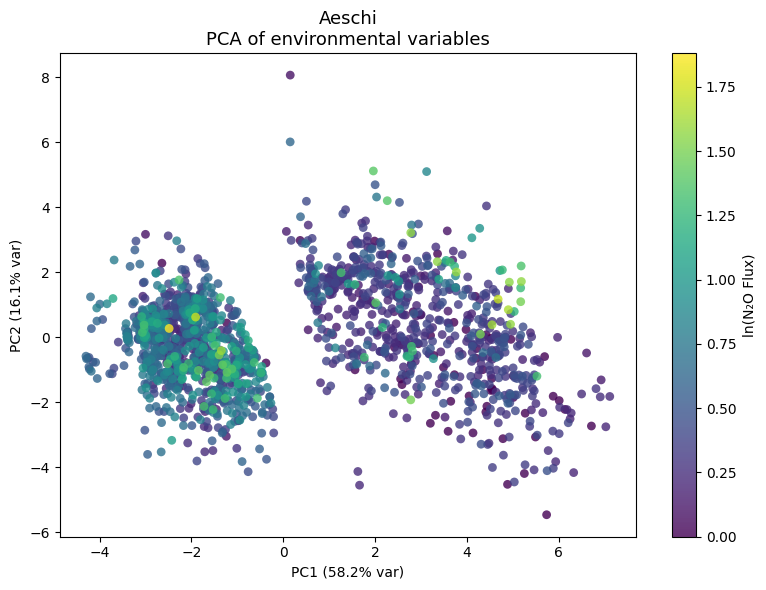

In [8]:
import matplotlib.cm as cm

# --- transformation ---
aeschi_clean["N2O_Flux_ln"] = np.where(
    aeschi_clean["N2O_Flux"] > 0,
    np.log1p(aeschi_clean["N2O_Flux"]),
    0
)

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_pca(aeschi_clean, "Aeschi")


# t-SNE plots

In [18]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X = X.dropna()
y = y.loc[X.index]

# Scale predictors
X_scaled = StandardScaler().fit_transform(X)

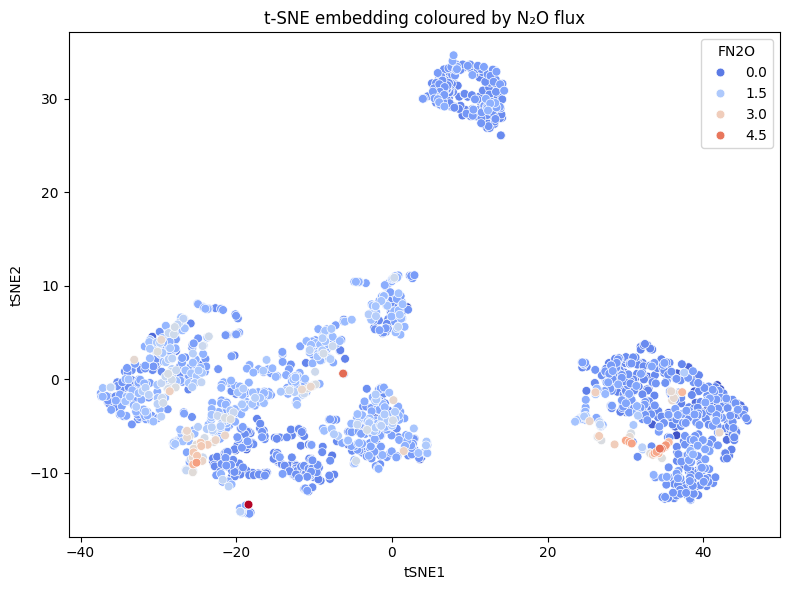

In [10]:
from sklearn.manifold import TSNE

tsne_1 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_1 = tsne_1.fit_transform(X_scaled)

tsne_df_1 = pd.DataFrame(X_tsne_1, columns=["tSNE1", "tSNE2"])
tsne_df_1["FN2O"] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_1, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

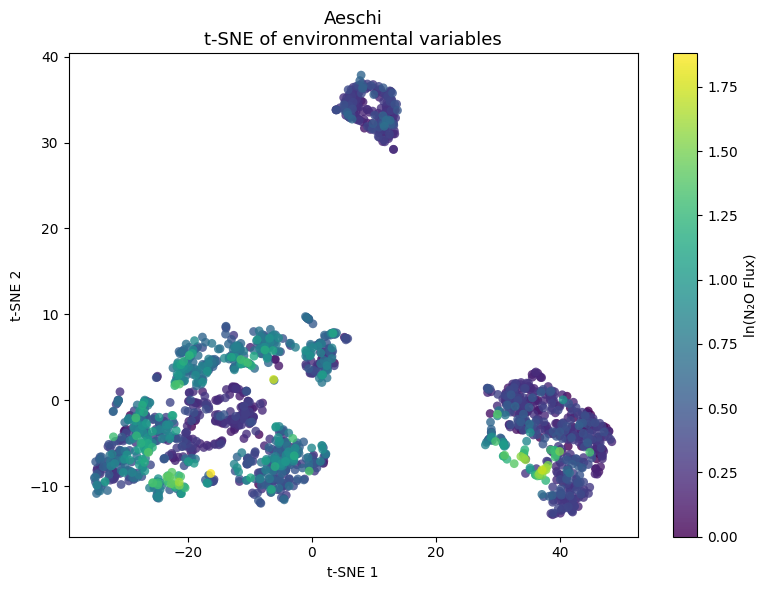

In [11]:
# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_tsne(aeschi_clean, "Aeschi")

# UMAP plots

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


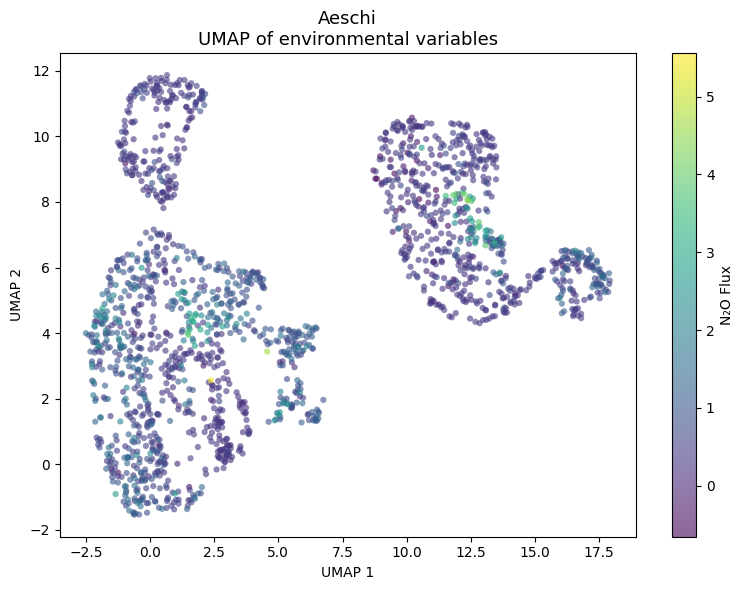

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("N₂O Flux")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_umap(aeschi_clean, "Aeschi")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


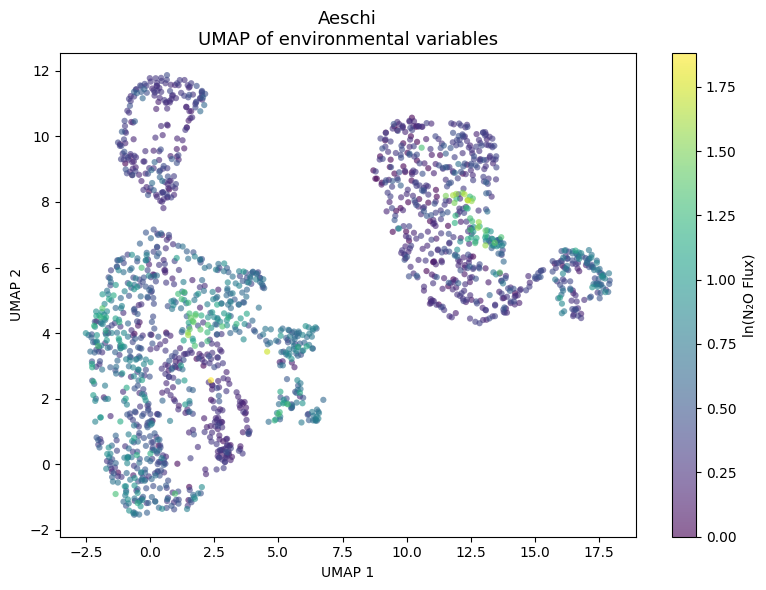

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_umap(aeschi_clean, "Aeschi")

# Other analysis plots

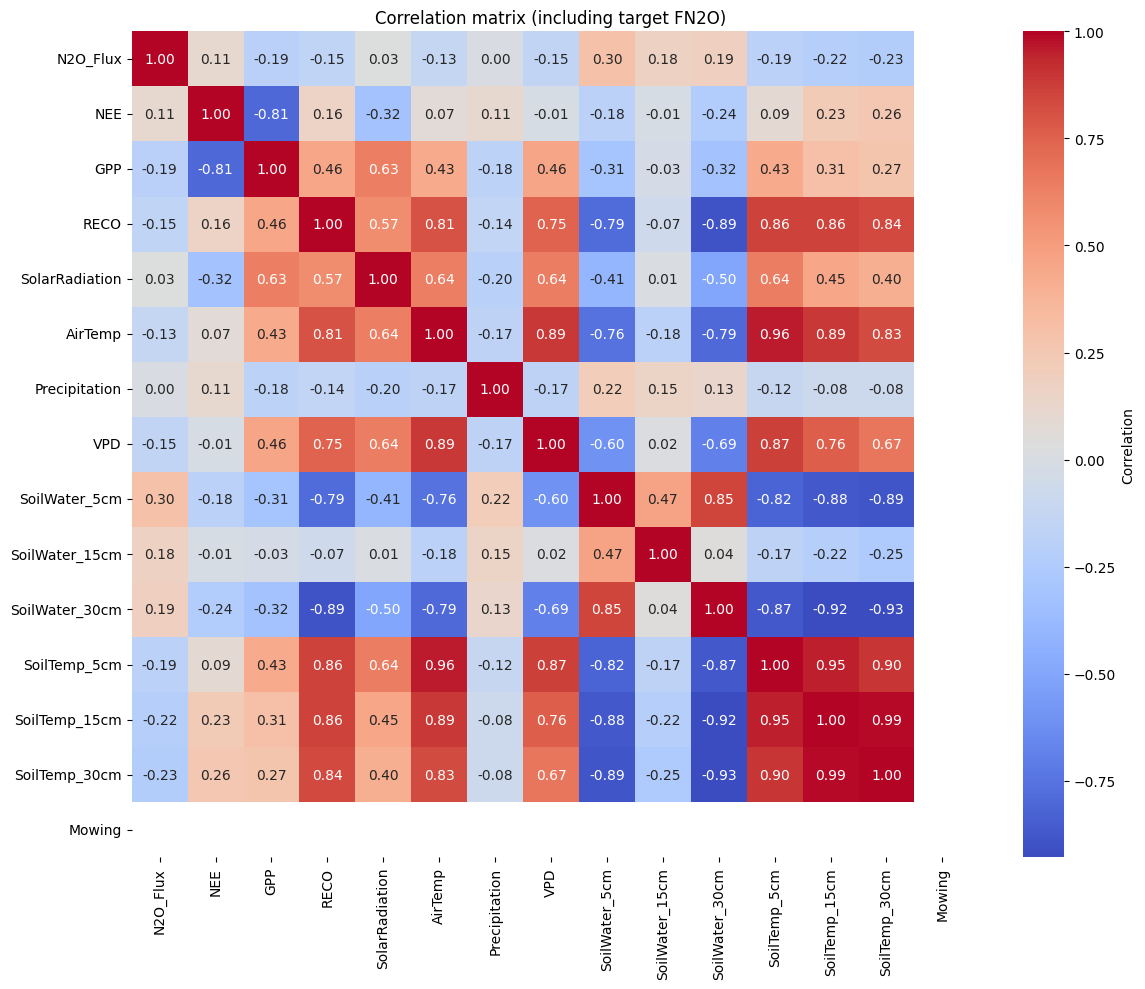

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = aeschi.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

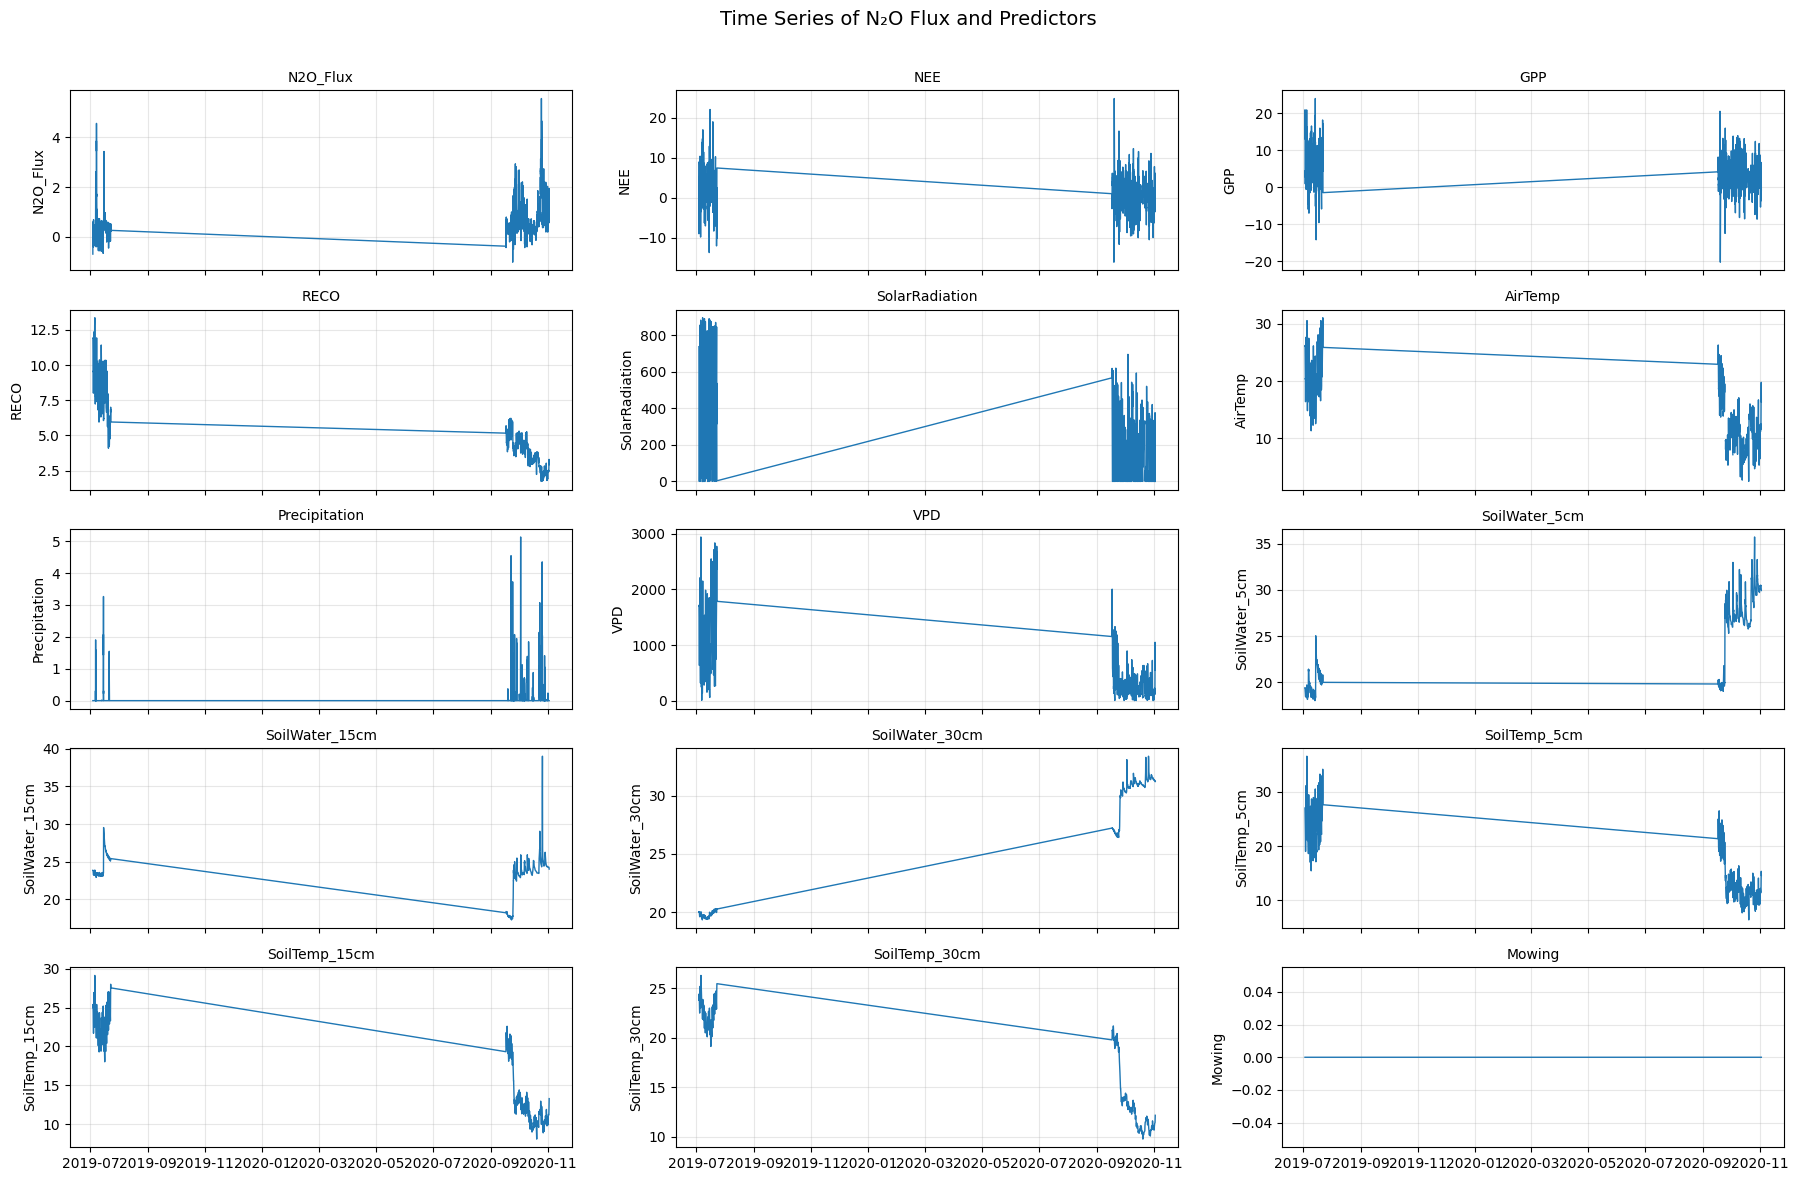

In [21]:
# Variables to plot (excluding Timestamp)
vars_to_plot = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm", "Mowing"
]

# Create subplots grid
n_cols = 3
n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    ax.plot(aeschi["Timestamp"], aeschi[var], lw=1)
    ax.set_title(var, fontsize=10)
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Time Series of N₂O Flux and Predictors", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

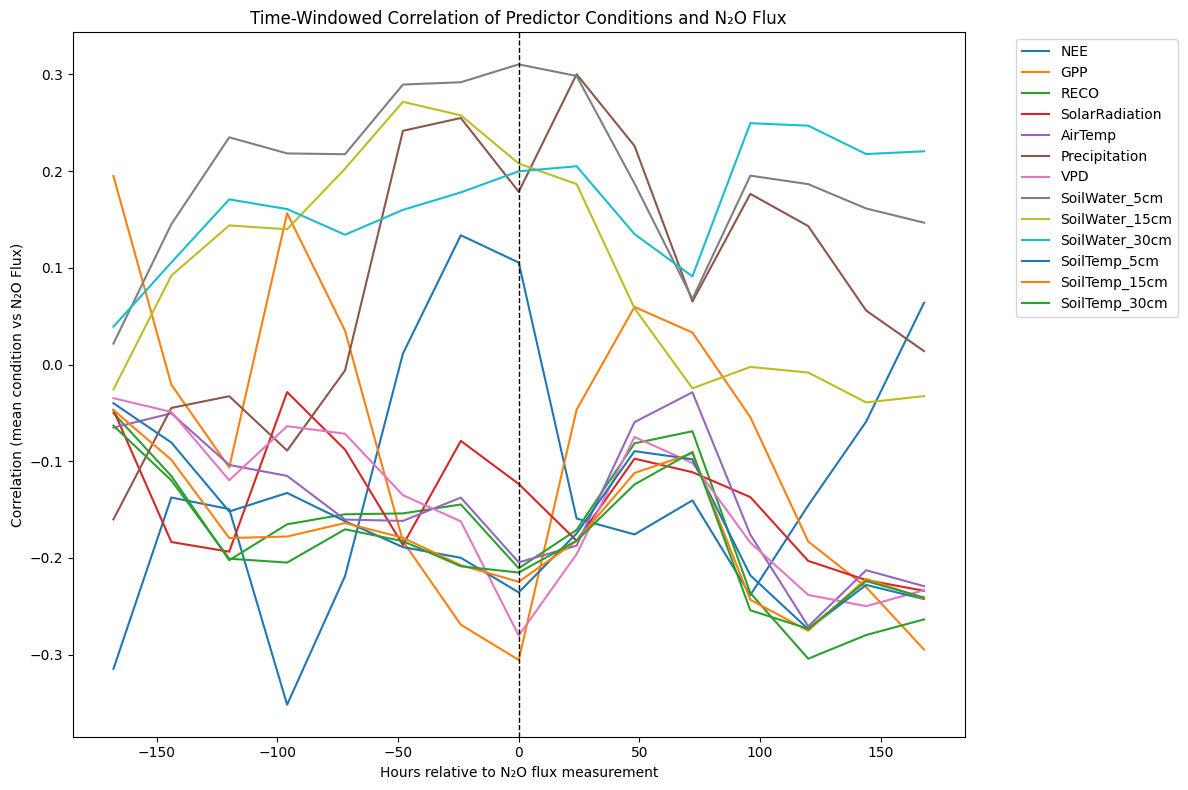

In [22]:
aeschi_time_index = aeschi.copy()
aeschi_time_index = aeschi_time_index.set_index("Timestamp")

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm", "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    #"Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]
target = "N2O_Flux"

# --- Parameters ---
window_hours = 24
step_hours   = 24
max_hours    = 7*24 # one week
offsets      = range(-max_hours, max_hours + step_hours, step_hours)

# --- Precompute rolling means ---
window = f"{window_hours}h"
rolling_means = aeschi_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations ---
lag_corrs = {}
for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = aeschi_time_index[[target]].join(shifted.rename("past_mean"))
        corr = aligned[target].corr(aligned["past_mean"])
        corrs.append(corr)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours relative to N₂O flux measurement")
plt.ylabel("Correlation (mean condition vs N₂O Flux)")
plt.title("Time-Windowed Correlation of Predictor Conditions and N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()